<a href="https://colab.research.google.com/github/rinermdhn/Hology-2024---Data-Mining/blob/main/Nastar_Hology_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [ ]:
# Imports

import warnings
warnings.filterwarnings('ignore')

# Scientific Tools
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

# Plotting Tools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Scikit Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

# Tensorflow & Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.regularizers import l2

# Image
from PIL import Image

Load Dataset

In [ ]:
from google.colab import files

# Mengunggah berkas kaggle.json (token API)
files.upload()

# Membuat direktori bernama kaggle dan menyalin berkas kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Mengubah izin berkas
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
! kaggle competitions download penyisihan-hology-7-data-mining-competition

  0% 0.00/9.74M [00:00<?, ?B/s]
100% 9.74M/9.74M [00:00<00:00, 120MB/s]


In [ ]:
! unzip /content/penyisihan-hology-7-data-mining-competition.zip

Archive:  /content/penyisihan-hology-7-data-mining-competition.zip
  inflating: sample_submission.csv   
  inflating: test/test/1000.jpg      
  inflating: test/test/1001.jpg      
  inflating: test/test/1002.jpg      
  inflating: test/test/1003.png      
  inflating: test/test/1004.jpg      
  inflating: test/test/1005.jpg      
  inflating: test/test/1006.png      
  inflating: test/test/1007.jpg      
  inflating: test/test/1008.png      
  inflating: test/test/1009.jpg      
  inflating: test/test/1010.jpg      
  inflating: test/test/1011.jpg      
  inflating: test/test/1012.jpg      
  inflating: test/test/1013.jpg      
  inflating: test/test/1014.jpg      
  inflating: test/test/1015.jpg      
  inflating: test/test/1016.jpg      
  inflating: test/test/1017.jpg      
  inflating: test/test/1018.jpg      
  inflating: test/test/1019.jpg      
  inflating: test/test/1020.jpg      
  inflating: test/test/1021.jpg      
  inflating: test/test/1022.png      
  inflating: test/tes

# Pre Processing

In [ ]:
df = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/sample_submission.csv')
df.head()

,id,jenis,warna
0,1,1,1
1,2,0,2
2,3,1,3
3,4,1,1
4,5,0,4


In [ ]:
# Ubah id menjadi string
df['id'] = df['id'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      777 non-null    object
 1   jenis   777 non-null    int64 
 2   warna   777 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 18.3+ KB


Encoding kategori jenis dan warna.

In [ ]:
df_encoded = pd.get_dummies(df, columns=['jenis', 'warna'])
df_encoded.head()

,id,jenis_0,jenis_1,warna_0,warna_1,warna_2,warna_3,warna_4
0,1,False,True,False,True,False,False,False
1,2,True,False,False,False,True,False,False
2,3,False,True,False,False,False,True,False
3,4,False,True,False,True,False,False,False
4,5,True,False,False,False,False,False,True


Direktori data

In [ ]:
train_path = '/content/train/train/' # path data train
test_path = '/content/test/test/'    # path data test

Terdapat beberapa file gambar yang memiliki format .png, akan disamakan agar seluruhnya memiliki format .jpg

In [ ]:
def convert_images_to_jpg(folder_path):
    for filename in os.listdir(folder_path):
        # Cek apakah file memiliki ekstensi bukan .jpg
        if not filename.endswith('.jpg'):
            # Buka gambar
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)

            # Ubah nama file menjadi .jpg
            new_filename = os.path.splitext(filename)[0] + '.jpg'
            new_img_path = os.path.join(folder_path, new_filename)

            # Konversi dan simpan sebagai .jpg
            rgb_img = img.convert('RGB')  # Konversi ke RGB untuk kompatibilitas .jpg
            rgb_img.save(new_img_path, 'JPEG')

            print(f"{filename} berhasil dikonversi ke {new_filename}")

# Konversi gambar di train dan test folder
convert_images_to_jpg(train_path)
convert_images_to_jpg(test_path)

515.png berhasil dikonversi ke 515.jpg
316.png berhasil dikonversi ke 316.jpg
394.png berhasil dikonversi ke 394.jpg
252.png berhasil dikonversi ke 252.jpg
747.png berhasil dikonversi ke 747.jpg
298.png berhasil dikonversi ke 298.jpg
591.png berhasil dikonversi ke 591.jpg
329.png berhasil dikonversi ke 329.jpg
479.png berhasil dikonversi ke 479.jpg
184.png berhasil dikonversi ke 184.jpg
516.png berhasil dikonversi ke 516.jpg
333.png berhasil dikonversi ke 333.jpg
207.png berhasil dikonversi ke 207.jpg
487.png berhasil dikonversi ke 487.jpg
288.png berhasil dikonversi ke 288.jpg
313.png berhasil dikonversi ke 313.jpg
587.png berhasil dikonversi ke 587.jpg
632.png berhasil dikonversi ke 632.jpg
647.png berhasil dikonversi ke 647.jpg
358.png berhasil dikonversi ke 358.jpg
18.png berhasil dikonversi ke 18.jpg
493.png berhasil dikonversi ke 493.jpg
393.png berhasil dikonversi ke 393.jpg
511.png berhasil dikonversi ke 511.jpg
219.png berhasil dikonversi ke 219.jpg
31.png berhasil dikonversi 

In [ ]:
train_img = [train_path + str(i) + '.jpg' for i in df['id'].values]
test_img = [test_path + str(i) + '.jpg' for i in df_test['id'].values]

Akan diperiksa apakah ada data file yg corrupted atau tidak.

In [ ]:
def check_corrupted_images(image_paths):
  corrupted_images = []
  for img_path in tqdm(image_paths):
    try:
      img = Image.open(img_path)
      img.verify()  # Verifikasi integritas file gambar
    except (IOError, SyntaxError) as e:
      print(f"Gambar rusak: {img_path}, Kesalahan: {e}")
      corrupted_images.append(img_path)
  return corrupted_images

In [ ]:
corrupted_train = check_corrupted_images(train_img)
if corrupted_train :
  print("Gambar rusak ditemukan di train_img:")
  for img_path in corrupted_train:
    print(img_path)
else:
  print("Tidak ada gambar rusak yang ditemukan di train_img.")

100%|██████████| 777/777 [00:00<00:00, 8911.73it/s]

Tidak ada gambar rusak yang ditemukan di train_img.


In [ ]:
corrupted_test = check_corrupted_images(test_img)
if corrupted_test :
  print("Gambar rusak ditemukan di test_img:")
  for img_path in corrupted_train:
    print(img_path)
else:
  print("Tidak ada gambar rusak yang ditemukan di test_img.")

100%|██████████| 334/334 [00:00<00:00, 7255.30it/s]

Tidak ada gambar rusak yang ditemukan di test_img.


Melihat beberapa gambar.

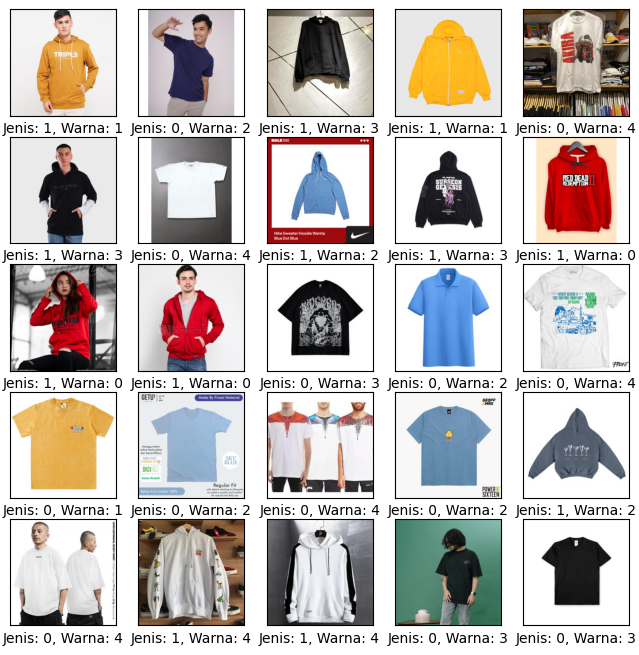

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    img = Image.open(train_img[i])
    img = np.array(img)

    plt.imshow(img)
    plt.xlabel(f'Jenis: {df["jenis"][i]}, Warna: {df["warna"][i]}')

plt.show()

Melihat distribusi dari masing-masing kelas.

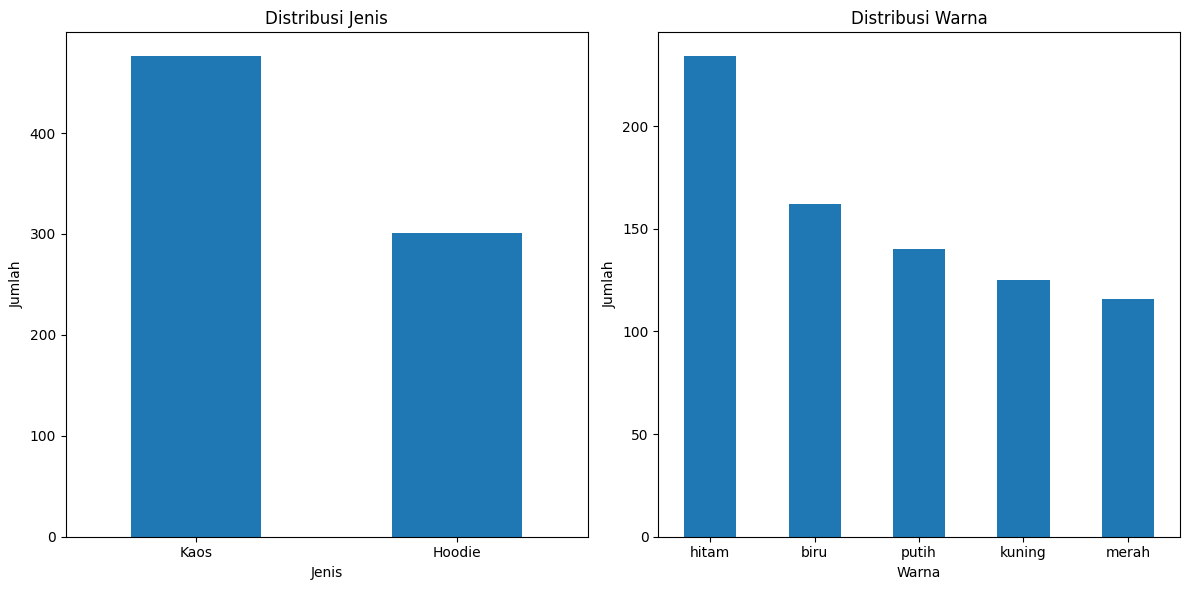

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot bar untuk 'jenis'
jenis_labels = {0: 'Kaos', 1: 'Hoodie'}

jenis_counts = df['jenis'].value_counts()
jenis_counts.plot(kind='bar', ax=axes[0])

axes[0].set_title('Distribusi Jenis')
axes[0].set_xlabel('Jenis')
axes[0].set_xticklabels([jenis_labels[int(x)] for x in jenis_counts.index], rotation=0)
axes[0].set_ylabel('Jumlah')

# Plot bar untuk 'warna'
warna_labels = {0: 'merah', 1: 'kuning', 2: 'biru', 3: 'hitam', 4: 'putih'}

warna_counts = df['warna'].value_counts()
warna_counts.plot(kind='bar', ax=axes[1])

axes[1].set_title('Distribusi Warna')
axes[1].set_xlabel('Warna')
axes[1].set_xticklabels([warna_labels[int(x)] for x in warna_counts.index], rotation=0)
axes[1].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

In [ ]:
# Set image dimensions
image_height = 32
image_width = 32
store_list = []

# Iterate through each image path in the train_img list
for img_path in tqdm(train_img):
    if os.path.exists(img_path):
        image_check = image.load_img(img_path, target_size=(image_height, image_width))
        image_check = image.img_to_array(image_check)
        # Scale the images
        image_check = image_check / 255
        store_list.append(image_check)
    else:
        print(f"File {img_path} tidak ditemukan.")

# Convert the list to a numpy array
X_train = np.array(store_list)

100%|██████████| 777/777 [00:00<00:00, 1688.03it/s]


# Model

Untuk melakukan klasfikasi multilabel pada dataset ini, kami memutuskan untuk menggunakan CNN (Convolutional Neural Networks).

In [ ]:
labels = []
used_columns = ['jenis','warna']

# getting labels for the columns used
for index, row in df.iterrows():
    tags = []
    for col in used_columns:
        tags.append(row[col])

    labels.append(tags)

labels = np.array(labels)
print(labels)

[[1 1]
 [0 2]
 [1 3]
 ...
 [1 3]
 [0 0]
 [0 3]]


In [ ]:
# Membuat vektor binary untuk input labels
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)

print(mlb.classes_)
print(labels[0])

[0 1 2 3 4]
[0 1 0 0 0]


In [ ]:
X_train = np.array(store_list)

y_train_jenis = df['jenis']
y_train_warna = df['warna']

In [ ]:
X_train.shape

(777, 32, 32, 3)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model

# Input layer
input_shape = (32, 32, 3)
input_layer = Input(shape=input_shape)

# Shared convolutional layers
x = Conv2D(32, (3, 3), padding="same", activation="relu")(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), padding="same", activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(128, activation="relu")(x)

# Output layer for `jenis` (2 classes: kaos, hoodie)
output_jenis = Dense(2, activation="softmax", name="jenis")(x)

# Output layer for `warna` (5 classes: merah, kuning, biru, hitam, putih)
output_warna = Dense(5, activation="softmax", name="warna")(x)

# Define the model
model = Model(inputs=input_layer, outputs=[output_jenis, output_warna])

# Compile the model
model.compile(
    optimizer="adam",
    loss={"jenis": "sparse_categorical_crossentropy", "warna": "sparse_categorical_crossentropy"},
    metrics={"jenis": ["accuracy"], "warna": ["accuracy"]}
)

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 32, 32, 32)     │            896 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_22          │ (None, 16, 16, 32)     │              0 │ conv2d_22[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_34 (Dropout)      │ (None, 16, 16, 32)     │              0 │ max_pooling2d_22[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 16, 16, 64)     │         18,496 │ dropout_34[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_23          │ (None, 8, 8, 64)       │              0 │ conv2d_23[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_35 (Dropout)      │ (None, 8, 8, 64)       │              0 │ max_pooling2d_23[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 4096)           │              0 │ dropout_35[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 128)            │        524,416 │ flatten_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ jenis (Dense)             │ (None, 2)              │            258 │ dense_13[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ warna (Dense)             │ (None, 5)              │            645 │ dense_13[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 544,711 (2.08 MB)

 Trainable params: 544,711 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train, {"jenis": y_train_jenis, "warna": y_train_warna},
    epochs=20,
    validation_split=0.3
)


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - jenis_accuracy: 0.5766 - loss: 2.3234 - warna_accuracy: 0.3365 - val_jenis_accuracy: 0.6282 - val_loss: 1.6815 - val_warna_accuracy: 0.7308
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - jenis_accuracy: 0.6360 - loss: 1.3679 - warna_accuracy: 0.7498 - val_jenis_accuracy: 0.6795 - val_loss: 1.1327 - val_warna_accuracy: 0.8333
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - jenis_accuracy: 0.7270 - loss: 0.9796 - warna_accuracy: 0.8571 - val_jenis_accuracy: 0.5940 - val_loss: 0.9129 - val_warna_accuracy: 0.8974
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - jenis_accuracy: 0.7343 - loss: 0.7683 - warna_accuracy: 0.9315 - val_jenis_accuracy: 0.6880 - val_loss: 0.7884 - val_warna_accuracy: 0.9103
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - jenis_accuracy: 0.7553 - loss: 0.7237 - warna_accuracy: 0.9237 - val_jenis_accuracy: 0.7436 - val_loss: 0.8438 - val_warna_accuracy: 0.8932
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━

Diperoleh hasil akhir untuk accuracy jenis adalah 0.8759 dan untuk accuracy warna adalah 0.9815. Perhatikan bahwa loss semakin kecil seiring dengan berjalannya epoch.

Accuracy warna untuk data train dan data validasi tidak terlalu berbeda, hal ini menandakan bahwa model sudah cukup baik untuk memprediksi warna. Namun, accuracy jenis untuk data train dan data validasi mempunyai perbedaan cukup mengkhawatirkan. Model sepertinya mempunyai indikasi overfit untuk jenis.

# Test

In [ ]:
df_test.head()

,id,jenis,warna
0,778,0,0
1,779,0,0
2,780,0,0
3,781,0,0
4,782,0,0


In [ ]:
# Ubah id menjadi string
df_test['id'] = df_test['id'].astype(str)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      334 non-null    object
 1   jenis   334 non-null    int64 
 2   warna   334 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ KB


In [ ]:
image_height = 32
image_width = 32
store_list = []
for i in tqdm(range(df_test.shape[0])):
  path = '/content/test/test/' + df_test['id'][i] + '.jpg'
  if os.path.exists(path):
    image_check = image. load_img(path, target_size=(image_height, image_width))
    image_check = image.img_to_array(image_check)
  # scaling the images
    image_check = image_check/255
    store_list.append (image_check)

  else:
    print(f"File {path} tidak ditemukan.")

X_test = np.array(store_list)

100%|██████████| 334/334 [00:00<00:00, 1521.28it/s]


In [ ]:
# Prediksi
predictions = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
predictions

[array([[9.86752689e-01, 1.32472450e-02],
        [5.36021660e-04, 9.99463916e-01],
        [1.25473008e-01, 8.74527037e-01],
        [8.39365244e-01, 1.60634771e-01],
        [7.02905163e-05, 9.99929607e-01],
        [5.13796270e-01, 4.86203700e-01],
        [7.11253136e-02, 9.28874671e-01],
        [6.62783906e-02, 9.33721602e-01],
        [1.61709115e-02, 9.83829141e-01],
        [9.95280147e-01, 4.71987436e-03],
        [9.96681809e-01, 3.31824319e-03],
        [7.16529071e-01, 2.83470929e-01],
        [9.98061359e-01, 1.93868857e-03],
        [9.33206737e-01, 6.67932853e-02],
        [9.99875069e-01, 1.25000239e-04],
        [1.04130678e-01, 8.95869195e-01],
        [6.36620939e-01, 3.63379061e-01],
        [3.72550696e-01, 6.27449334e-01],
        [9.08582866e-01, 9.14170891e-02],
        [9.96762216e-01, 3.23770777e-03],
        [2.34917298e-01, 7.65082657e-01],
        [8.14202070e-01, 1.85797900e-01],
        [1.24495931e-01, 8.75504076e-01],
        [2.64407834e-03, 9.9735581

In [ ]:
# Pad the shorter array with zeros to match the longer one
max_shape = max(predictions[0].shape, predictions[1].shape)
padded_predictions = []
for pred in predictions:
    pad_width = tuple((0, max_dim - pred_dim) for max_dim, pred_dim in zip(max_shape, pred.shape))
    padded_pred = np.pad(pred, pad_width, mode='constant', constant_values=0)
    padded_predictions.append(padded_pred)
predictions = padded_predictions

# Rounding
rounded_predictions = [np.round(pred) for pred in predictions]
rounded_predictions

[array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        ...,
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.]], dtype=float32)]

In [ ]:
combined_predictions = np.concatenate(rounded_predictions, axis=1)

num_jenis_cols = rounded_predictions[0].shape[1]
num_warna_cols = rounded_predictions[1].shape[1]

jenis_cols = [f'jenis_{i}' for i in range(num_jenis_cols)]
warna_cols = [f'warna_{i}' for i in range(num_warna_cols)]
all_cols = jenis_cols + warna_cols

# Create DataFrame for combined predictions and  column names
df_submission = pd.DataFrame(combined_predictions, columns=all_cols)
df_submission['id'] = df_test['id']

# Reorder columns
df_submission = df_submission[['id'] + all_cols]
df_submission

,id,jenis_0,jenis_1,jenis_2,jenis_3,jenis_4,warna_0,warna_1,warna_2,warna_3,warna_4
0,778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,779,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,780,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,781,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,782,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
329,1107,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
330,1108,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
331,1109,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
332,1110,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Convert boolean values back
def get_jenis(row):
    if row['jenis_0'] == 1:
        return 0
    elif row['jenis_1'] == 1:
        return 1
    else:
        return None

def get_warna(row):
  if row['warna_0'] == 1:
    return 0
  elif row['warna_1'] == 1:
    return 1
  elif row['warna_2'] == 1:
    return 2
  elif row['warna_3'] == 1:
    return 3
  elif row['warna_4'] == 1:
    return 4
  else:
    return 0

df_submission['jenis'] = df_submission.apply(get_jenis, axis=1)
df_submission['warna'] = df_submission.apply(get_warna, axis=1)

# Remove the temporary columns
df_submission = df_submission[['id', 'jenis', 'warna']]

# Save the DataFrame to a CSV file
df_submission.to_csv('submission.csv', index=False)

In [ ]:
df_submission

,id,jenis,warna
0,778,0,3
1,779,1,3
2,780,1,2
3,781,0,1
4,782,1,3
...,...,...,...
329,1107,1,0
330,1108,0,4
331,1109,1,2
332,1110,0,3


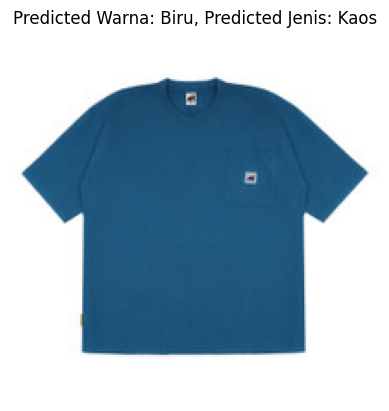

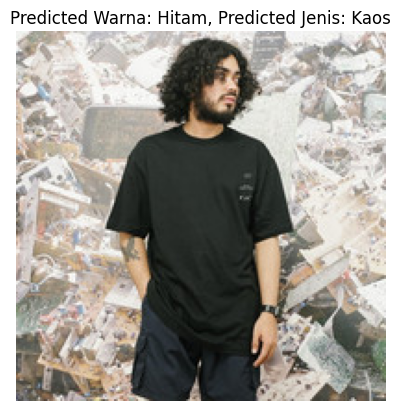

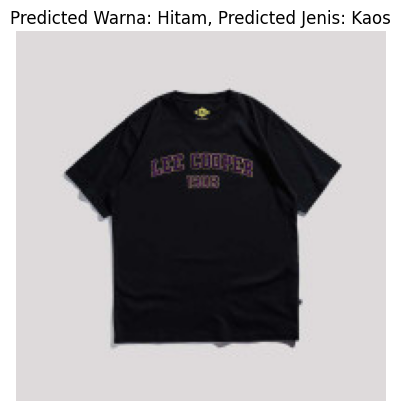

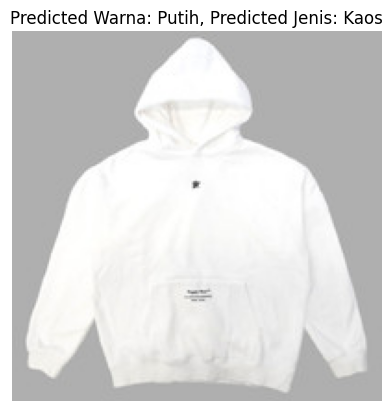

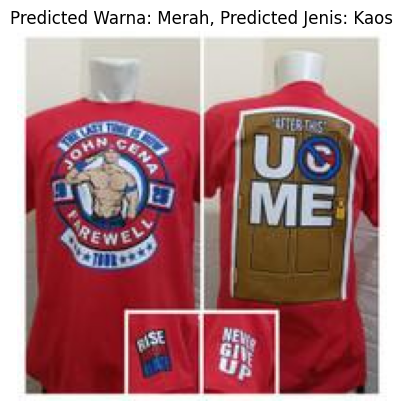

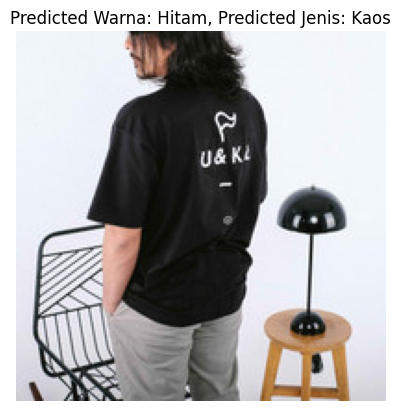

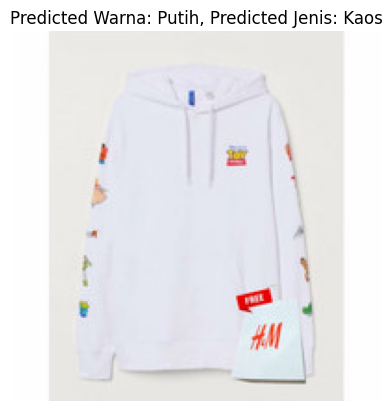

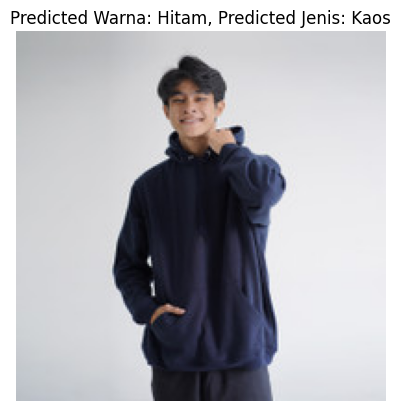

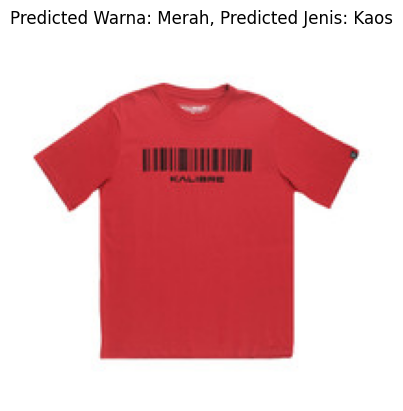

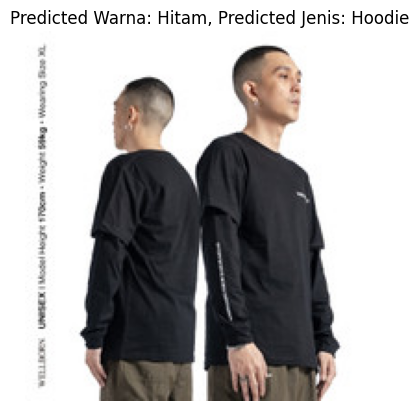

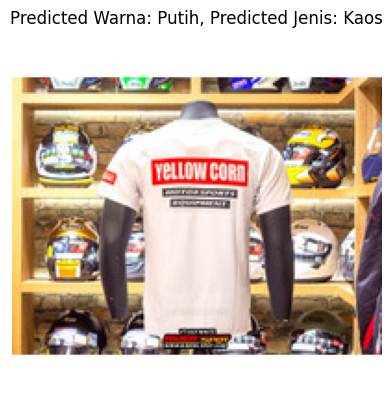

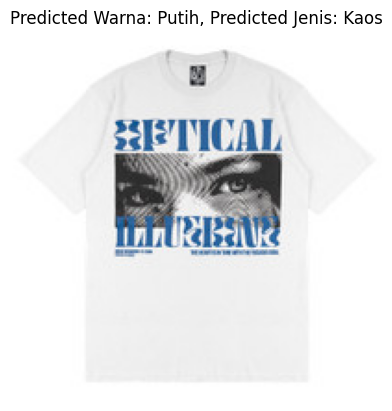

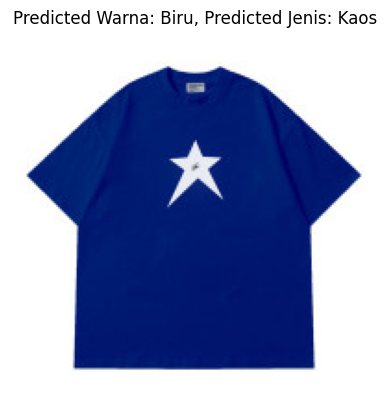

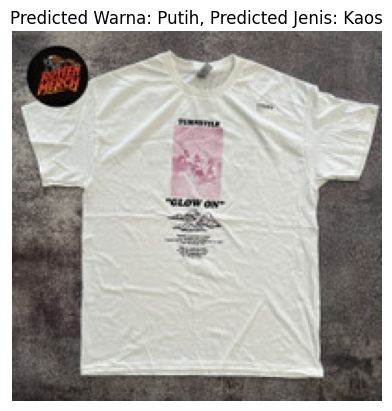

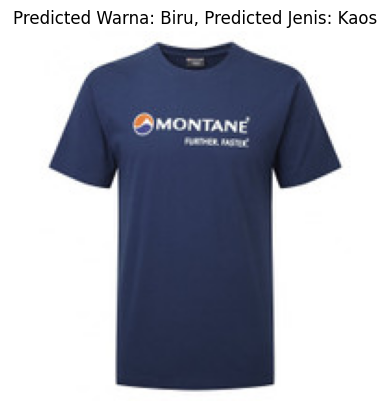

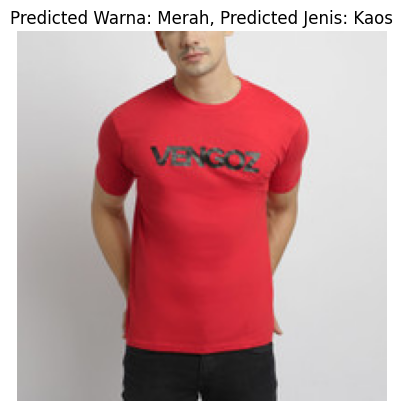

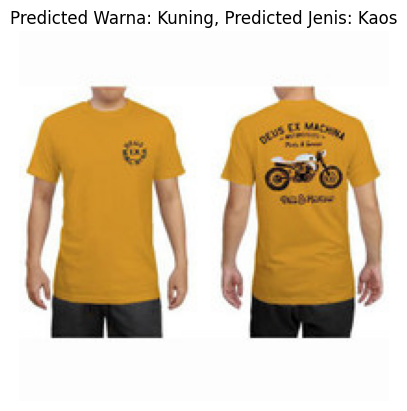

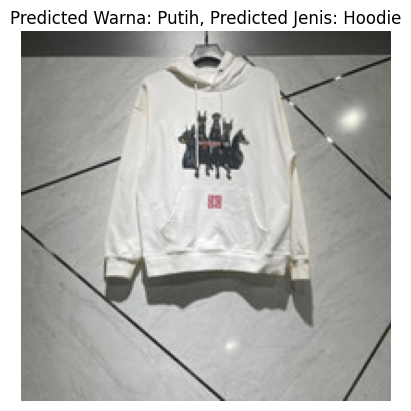

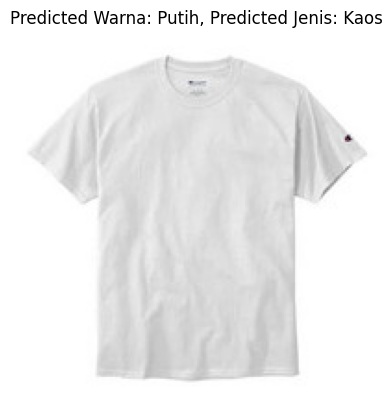

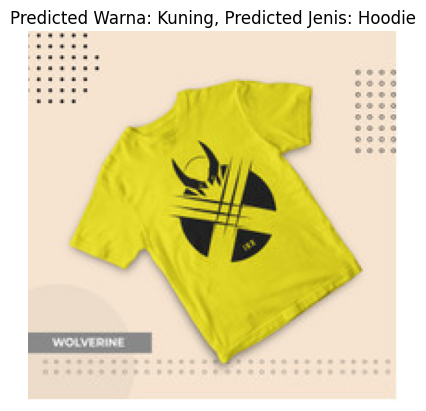

In [ ]:
# Mendefinisikan label
jenis_labels = {0: 'Kaos', 1: 'Hoodie'}
warna_labels = {0: 'Merah', 1: 'Kuning', 2: 'Biru', 3: 'Hitam', 4: 'Putih'}

# Melihat hasil beberapa prediksi
random_indices = np.random.choice(len(df_submission), size=20, replace=False)  # Mengambil indeks acak

for i in random_indices:
    image_id = df_submission['id'].iloc[i]
    image_path = f'/content/test/test/{image_id}.jpg'

    # Memuat gambar
    img = mpimg.imread(image_path)

    # Mengambil prediksi 'warna' dari df_submission
    predicted_warna = df_submission.loc[df_submission['id'] == image_id, 'warna'].iloc[0]
    # Mengambil prediksi 'jenis' dari df_submission
    predicted_jenis = df_submission.loc[df_submission['id'] == image_id, 'jenis'].iloc[0]

    # Mengonversi ke label
    predicted_warna_label = warna_labels[predicted_warna]
    predicted_jenis_label = jenis_labels[predicted_jenis]

    # Menampilkan gambar
    plt.imshow(img)
    plt.title(f"Predicted Warna: {predicted_warna_label}, Predicted Jenis: {predicted_jenis_label}")
    plt.axis('off')
    plt.show()


Sesuai perkiraan, model sudah baik dalam memprediksi warna tapi kurang baik untuk memprediksi jenis.